# Problem Statement

> **The goal of this notebook is to study the dataset of a US city suburb (in particular Boston) to estimate the changes in the median housing values of a suburb due to the influence of several social and economic factors such as crime rate, full-value property tax, and black population to name a few.**

# Downloading the dataset

The attributes in the dataset are as follows:

Input features in order:
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000 [$/10k]
11. PTRATIO: pupil-teacher ratio by town
12. B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population

Output variable:
1. MEDV: Median value of owner-occupied homes in $1000's [k$]



In [8]:
boston_suburb_url = 'https://www.kaggle.com/fedesoriano/the-boston-houseprice-data'

In [9]:
!pip install opendatasets --upgrade --quiet

In [10]:
import opendatasets as od
od.download(boston_suburb_url)

100%|██████████| 12.3k/12.3k [00:00<00:00, 13.0MB/s]

In [11]:
!pip install pandas --quiet

In [12]:
import pandas as pd
filepath = 'the-boston-houseprice-data/boston.csv'
house_df = pd.read_csv(filepath)

In [13]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [14]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
house_df.sample(8)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
416,10.83420,0.0,18.10,0,0.679,6.782,90.8,1.8195,24,666.0,20.2,21.57,25.79,7.5
157,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
136,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437.0,21.2,378.25,16.90,17.4
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284.0,19.7,390.68,6.86,23.3
160,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403.0,14.7,338.92,5.50,27.0
320,0.16760,0.0,7.38,0,0.493,6.426,52.3,4.5404,5,287.0,19.6,396.90,7.20,23.8
26,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6
80,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,4,281.0,19.0,396.90,5.29,28.0


In [17]:
!pip install jovian --quiet

In [18]:
import jovian 

In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kyawhtetwin/boston-suburb-house-prices-linear-reg" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/kyawhtetwin/boston-suburb-house-prices-linear-reg


'https://jovian.com/kyawhtetwin/boston-suburb-house-prices-linear-reg'

# Exploratory Analysis & Visualization

In [21]:
!pip install plotly matplotlib seaborn --quiet

In [22]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## CRIM: Per Capita Crime Rate by Town

In [24]:
house_df['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [26]:
fig = px.histogram(house_df, x='CRIM', marginal='box', color='CHAS', title="CRIM: Per Capita Crime Rate By Town")
fig.update_layout(bargap=0.1)
fig.show()

> Observation: The distribution of crimes rates follows a power law. For most Boston suburbs, the number of crimes reported per town is very low, in fact, most of the crime rates below 0.99. There seems to be a correlation between crime rates and whether a city is bound to Charles River; it seems that suburbs bound the river are generally very likely to have small crime rates.*

## ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

In [27]:
house_df['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

In [31]:
house_df['ZN'].sample(10)

377     0.0
142     0.0
225     0.0
12     12.5
422     0.0
212     0.0
420     0.0
500     0.0
163     0.0
277    40.0
Name: ZN, dtype: float64

In [40]:
fig = px.histogram(house_df, x='ZN', marginal='box', color='CHAS',
             title="Proportion of residential land zoned for lots over 25,000 sq.ft.")
fig.update_layout(bargap=0.1)
fig.show()

## INDUS: Proportion of non-retail business acres per town

In [41]:
fig = px.histogram(house_df, x='INDUS', marginal='box', color='CHAS',
            title="Proportion of non-retail business acres per town"
            )
fig.update_layout(bargap=0.1)
fig.show()

## CHAS: Charles River Bound

In [38]:
# Most of the suburbs are nout bound by Charles River
house_df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

## NOX: nitric oxides concentration (parts per 10 million)

In [42]:
fig = px.histogram(house_df, x='NOX', marginal='box', color='CHAS', 
             title="Nitric oxides concentration (parts per 10 million)")
fig.update_layout(bargap=0.1)
fig.show()

## RM: Average number of rooms per dwelling

In [43]:
fig = px.histogram(house_df, x='RM', marginal='box', color='CHAS', 
             title="Average number of rooms per dwelling")
fig.update_layout(bargap=0.1)
fig.show()

> Observation: The distribution follows a normal distribution and most of the suburbs have an average of 5.6 to 6.7 rooms.

## AGE: proportion of owner-occupied units built prior to 1940

In [44]:
fig = px.histogram(house_df, x='AGE', marginal='box', color='CHAS', 
             title="proportion of owner-occupied units built prior to 1940")
fig.update_layout(bargap=0.1)
fig.show()

> Observation: Since the dataset was collected in 1970, the suburbs in Boston have most of the owner-occupied units built before 1940 (Most houses are at least 30 years old.)

## DIS: Weighted distances to five Boston employment centres

In [45]:
fig = px.histogram(house_df, x='DIS', marginal='box', color='CHAS', 
             title="Weighted distances to five Boston employment centres")
fig.update_layout(bargap=0.1)
fig.show()

> Observation: The distribution seems to follow normal distribution. Most of the suburbs are fairly close to five Boston employment centres.

## RAD: index of accessibility to radial highways

In [46]:
fig = px.histogram(house_df, x='RAD', marginal='box', color='CHAS', 
             title="Index of accessibility to radial highways")
fig.update_layout(bargap=0.1)
fig.show()

## TAX: full-value property-tax rate per $10,000

In [47]:
fig = px.histogram(house_df, x='TAX', marginal='box', color='CHAS', 
             title="full-value property-tax rate per $10,000")
fig.update_layout(bargap=0.1)
fig.show()

## PTRATIO: pupil-teacher ratio by town

In [48]:
fig = px.histogram(house_df, x='PTRATIO', marginal='box', color='CHAS', 
             title="Pupil-teacher ratio by town")
fig.update_layout(bargap=0.1)
fig.show()

> Observation: Most of the suburbs have 20 teachers per student.

## B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

In [49]:
fig = px.histogram(house_df, x='B', marginal='box', color='CHAS', 
             title="Proportion of Black People")
fig.update_layout(bargap=0.1)
fig.show()

## LSTAT: % lower status of the population

In [50]:
fig = px.histogram(house_df, x='LSTAT', marginal='box', color='CHAS', 
             title="% Lower Status of the population")
fig.update_layout(bargap=0.1)
fig.show()

> Observation: The distribution seems to follow a normal distribution. It seems that most of the suburbs have between 4-14% of its population that is considered 'low' status.

## MEDV: Median value of owner-occupied homes in $1000's [k$]

In [75]:
fig = px.histogram(house_df, x='MEDV', marginal='box', color='CHAS', 
             title="Median Value of owner-occupired homes in thousand dollars")
fig.update_layout(bargap=0.1)
fig.show()

## Correlation

In [54]:
house_df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

# Fitting a Linear Regression with a few variables

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [95]:
input_col = ['LSTAT']
target_col = 'MEDV'

In [96]:
inputs, targets = house_df[input_col], house_df[target_col]
model = LinearRegression().fit(inputs, targets)

In [97]:
pred = model.predict(inputs)

In [98]:
mean_squared_error(targets, pred)

38.48296722989415

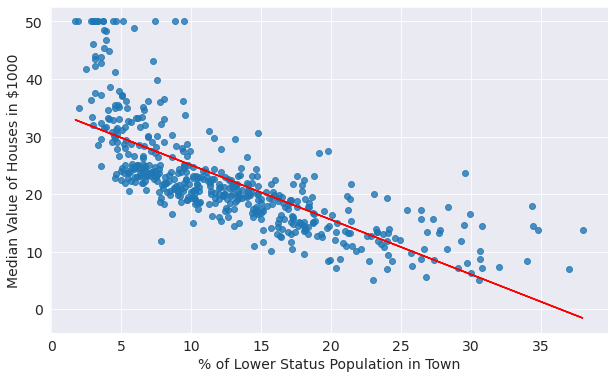

In [99]:
plt.scatter(inputs, targets, alpha=0.8)
plt.plot(inputs, pred, 'r')
plt.xlabel("% of Lower Status Population in Town")
plt.ylabel("Median Value of Houses in $1000")
plt.show()

RMSE: 18.41163065740267


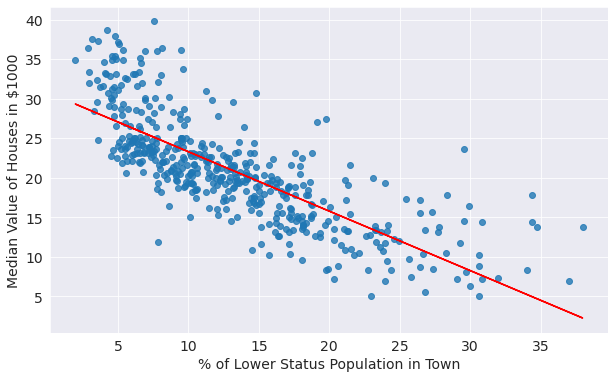

In [100]:
input_col = ['LSTAT']
target_col = 'MEDV'

# Remove rows where the median house values are greater than 40k
house_df_copy = house_df.copy()
house_df_copy = house_df_copy[house_df_copy['MEDV'] <= 40]

inputs, targets = house_df_copy[input_col], house_df_copy[target_col]
model = LinearRegression().fit(inputs, targets)

pred = model.predict(inputs)

rmse  = mean_squared_error(targets, pred)
print(f"RMSE: {rmse}")

plt.scatter(inputs, targets, alpha=0.8)
plt.plot(inputs, pred, 'r')
plt.xlabel("% of Lower Status Population in Town")
plt.ylabel("Median Value of Houses in $1000")
plt.show()


RMSE: 43.60055177116956


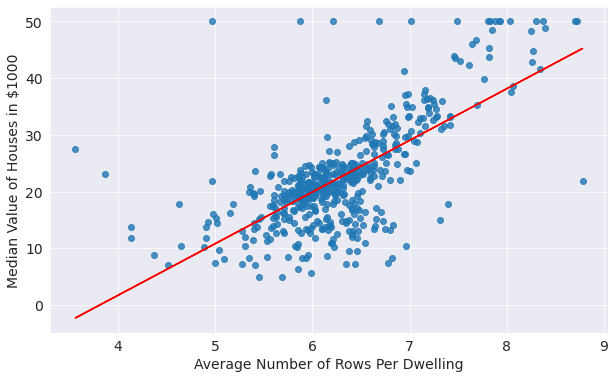

In [92]:
input_col = ['RM']
target_col = 'MEDV'

inputs, targets = house_df[input_col], house_df[target_col]
model = LinearRegression().fit(inputs, targets)

pred = model.predict(inputs)
rmse  = mean_squared_error(targets, pred)
print(f"RMSE: {rmse}")
plt.scatter(inputs, targets, alpha=0.8)
plt.plot(inputs, pred, 'r')
plt.xlabel("Average Number of Rows Per Dwelling")
plt.ylabel("Median Value of Houses in $1000")
plt.show()

RMSE: 29.368390639548636


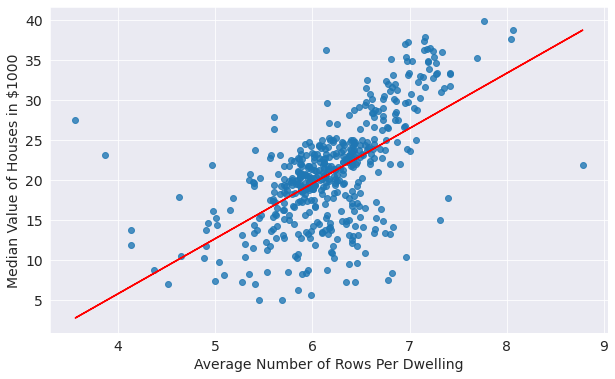

In [101]:
input_col = ['RM']
target_col = 'MEDV'

# Remove rows where the median house values are greater than 40k
house_df_copy = house_df.copy()
house_df_copy = house_df_copy[house_df_copy['MEDV'] <= 40]

inputs, targets = house_df_copy[input_col], house_df_copy[target_col]
model = LinearRegression().fit(inputs, targets)

pred = model.predict(inputs)
rmse  = mean_squared_error(targets, pred)
print(f"RMSE: {rmse}")
plt.scatter(inputs, targets, alpha=0.8)
plt.plot(inputs, pred, 'r')
plt.xlabel("Average Number of Rows Per Dwelling")
plt.ylabel("Median Value of Houses in $1000")
plt.show()

# Scaling the Data with Standard Scaler

In [112]:
house_df_small = house_df.copy()
house_df_small = house_df_small[house_df_small['MEDV'] < 40]

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(house_df_small[input_cols])

StandardScaler()

In [115]:
scaled_inputs = scaler.transform(house_df_small[input_cols])

# Training with Linear Regression

In [113]:
cols = list(house_df_small.columns)
input_cols, target_col = cols[:-1], cols[-1]
print(input_cols)
print(target_col)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MEDV


In [116]:
targets = house_df_small[target_col]

In [118]:
model = LinearRegression()
model.fit(scaled_inputs, targets)
preds = model.predict(scaled_inputs)
rmse  = mean_squared_error(targets, preds)
print(f"RMSE: {rmse}")

RMSE: 10.584163449331902


In [121]:
coef = model.coef_

In [122]:
model.intercept_

20.90652631578947

# Result and Conclusion

In [124]:
# The weights that Linear Regression assigns to each feature from training
pd.DataFrame({
    'features': input_cols,
    'weights': coef
}).sort_values(by='weights', ascending=False)

,features,weights
8,RAD,2.050172
5,RM,1.349484
1,ZN,0.858539
11,B,0.659438
3,CHAS,0.196734
2,INDUS,-0.389809
6,AGE,-0.487789
0,CRIM,-0.998834
10,PTRATIO,-1.433598
4,NOX,-1.476278


From examining the weights of Linear Regression after limiting the training sample to suburbs with median house value less than /$40,000, it seems that:

1. RAD(index of accessibility to radial highways), RM(average number of rooms per dwelling), ZN, B, and CHAS have a positive affect on median house value. Out of these factors, we can see that having good access to highways and larger number of rooms contribute most positively to the house value. 

2. LSTAT, DIS, TAX, NOX, PTRATIO, CRIM, AGE, and INDUS have a negative affect on the median house value. LSTAT, DIS, and TAX that negatively affected the value of the house in Boston suburb. 

In [125]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kyawhtetwin/boston-suburb-house-prices-linear-reg" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/kyawhtetwin/boston-suburb-house-prices-linear-reg


'https://jovian.com/kyawhtetwin/boston-suburb-house-prices-linear-reg'